In [1]:
# Fill in your name using the format below and student ID number
your_name = "Agaronian, Andrei"
student_id = "1017525"

In [600]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# Uncomment the following line to run in Google Colab
# !pip install --quiet openml 

In [4]:
# Uncomment the following line to run in Google Colab
#%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[]

In [5]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Andrei, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [7]:
#base_dir = '/content/drive/My Drive/TestAssignment' # For Google Colab
base_dir = './'

In [8]:
#Uncomment to link Colab notebook to Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [9]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
#import os
#oml.config.cache_directory = os.path.expanduser('/content/cache')

In [10]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [11]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [12]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

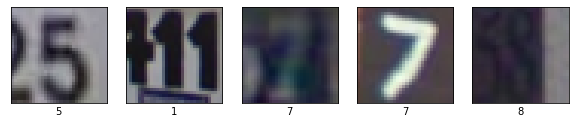

In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [546]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/3
63544/63544 [==============================] - 2s 39us/sample - loss: 2.2454 - accuracy: 0.1904 - val_loss: 2.2331 - val_accuracy: 0.1910
Epoch 2/3
63544/63544 [==============================] - 2s 34us/sample - loss: 2.2332 - accuracy: 0.1910 - val_loss: 2.2331 - val_accuracy: 0.1910
Epoch 3/3
63544/63544 [==============================] - 2s 36us/sample - loss: 2.2333 - accuracy: 0.1910 - val_loss: 2.2331 - val_accuracy: 0.1910
Saving to file
Model stored in ./
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 1

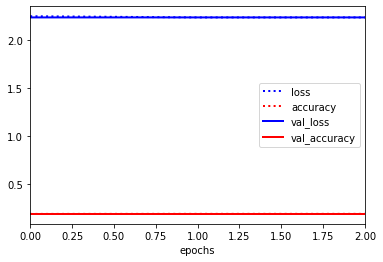

In [15]:
# Toy usage example
# Remove before submission
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# First build and store
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=True, epochs=3, batch_size=32)

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233231  0.190404  2.233096      0.190974
max  2.245365  0.190954  2.233145      0.190974


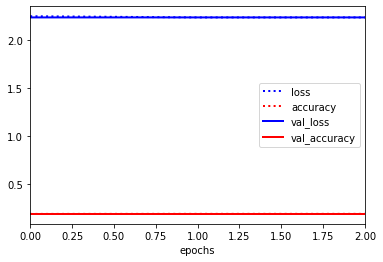

In [82]:
# Toy usage example
# Remove before submission
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False)

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_112 (Reshape)        (None, 3072)              0         
_________________________________________________________________
dense_411 (Dense)            (None, 128)               393344    
_________________________________________________________________
dense_412 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_413 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_414 (Dense)            (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.628392  0.262039  0

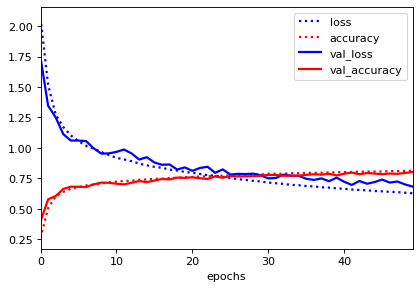

In [589]:
from tensorflow.keras import optimizers

def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer="adamax",
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=50, batch_size=32)
answer_q_1_1 = """Multi-class classification problem implies categorical crossentropy and softmax for last layer.
I use 3 hidden layers not to make it to overfit. The number of nodes is sufficiently narrow given the complexity
of the task. Only adaptive optimizers were considered since they are expected to work better. Adamax gives the
best results. The batch size used is a reasonable tradeoff: trains slow, converge fast. The model doesn't learn after
+- 50 epochs, as loss curves flatten. It doesn't over/underfit"""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [101]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Loading model from file
Success!
Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_113 (Reshape)        (None, 1024)              0         
_________________________________________________________________
dense_415 (Dense)            (None, 128)               131200    
_________________________________________________________________
dense_416 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_417 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_418 (Dense)            (None, 10)                330       
Total params: 141,866
Trainable params: 141,866
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.529068  0.281034  0

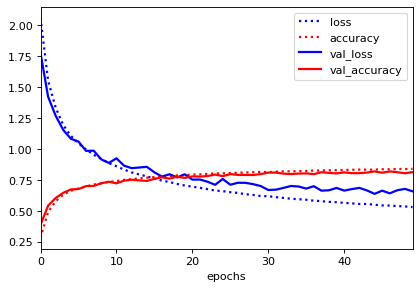

In [592]:
# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

# Adjusted model
def build_model_1_2():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer="adamax",
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=32)
answer_q_1_2 = """I only grayscale the images, which removes redundant infromation, since it is not needed for the
task. This decreases the number of parameters for the first dense layer, making the model more simple. Thus, we see
that it trains faster. The loss curve for validation set merely progresses after 30 epochs. Yet it doesn't grow, so
there is no overfit. Having less redundant information and less parameters to tune, the model achieves better accuracy
and lower loss"""
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_113 (Reshape)        (None, 1024)              0         
_________________________________________________________________
dense_415 (Dense)            (None, 128)               131200    
_________________________________________________________________
dense_416 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_417 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_418 (Dense)            (None, 10)                330       
Total params: 141,866
Trainable params: 141,866
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.529068  0.281034  0

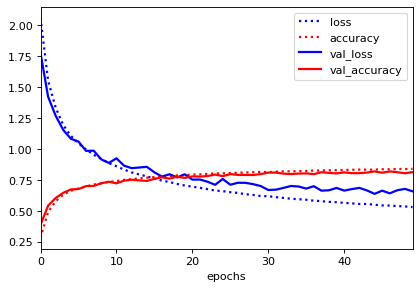

In [599]:
from tensorflow.keras import regularizers

def build_model_1_3():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer="adamax",
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=32)
answer_q_1_3 = """L1 makes model static. The model doesn't have very big number of parameters, so turning some
to 0 is a big penalization. Dropout results in slow progress: Adamax already gives different updates for
(in)frequent weights, plus it is used for more complex models. Batch Normalization is not good: makes loss
go up & down. It is used for very deep networks, this one only has 3 layers. L2 doesn't make model
horrible, but since there is no overfit, it makes model underfit. So I stick with model_1_2"""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_190"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_130 (Conv2D)          (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 13, 13, 128)       36992     
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 4, 4, 512)         590336    
_________________________________________________________________
flatten_36 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_627 (Dense)  

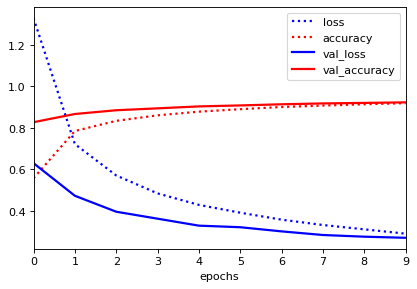

In [458]:
def build_model_2_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adamax',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=20, batch_size=32)
answer_q_2_1 = """The problem is same, so I use the same optimizer, loss function and batches as before.
I use 3 convolutional layers. The 1st layer has 32 filters: assumed to be sufficiently big not to lose infromation
but not too big: in deeper layers I use increasingly more filters due to maxpooling which prevents ovefitting,
but reduces the resolution. I increase the number of filters by a factor of 4. This way I try to avoid the decrease
in the number of activations. The factor seems big, but it allows to get 2% higher accuracy than using a factor of 2.
After flattetning there is dense layer of 64 nodes with the dropout to decrease the observed overfitting (many
parameters). The model succeds to generalize while preserving good accuracy and low loss. After 10 epochs expected to
start overfitting."""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential_228"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_244 (Conv2D)          (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_160 (MaxPoolin (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_245 (Conv2D)          (None, 13, 13, 128)       36992     
_________________________________________________________________
max_pooling2d_161 (MaxPoolin (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_246 (Conv2D)          (None, 4, 4, 512)         590336    
_________________________________________________________________
flatten_74 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_703 (Dense)  

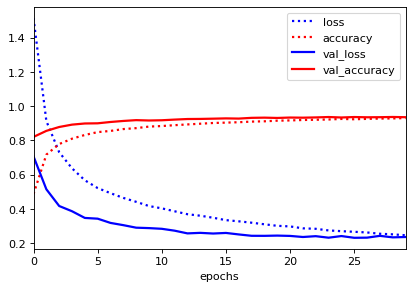

In [460]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    zoom_range=0.2,
    #shear_range=0.2, # the images are of low resolution
    rotation_range=15,
    # width_shift_range=0.2, # digits are assumed to be at the center
    # height_shift_range=0.2, # digits are assumed to be at the center
    # horizontal_flip = true, # makes no sense
    # vertical_flip = true, # makes no sense
)

augmented_split = train_datagen.flow(preprocessed_split[0], preprocessed_split[2], batch_size=32), preprocessed_split[1], preprocessed_split[3]
steps = int(preprocessed_split[0].shape[0] / 32)

run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=False, generator = True, epochs=30, batch_size=None, steps_per_epoch=steps)
answer_q_2_2 = """Shifting height/width not considered since digits are assumed to be centerized. Flipping the images
does not suit the problem domain. Shearing does not improve performance: most probably since resolution is small, it
creates too much noise. Both zooming and rotating improve the performace: make the model ovefit later while achieving
greater accuracy. When applied together make the model overfit only after 30th epoch and increase the validiton
accuracy by roughly 1.4%."""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

Accuracy:  0.9367005740759392
Answer is 799 characters long


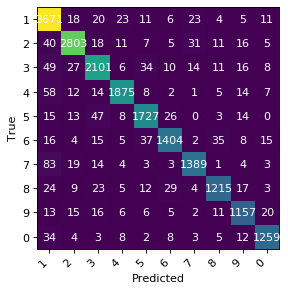

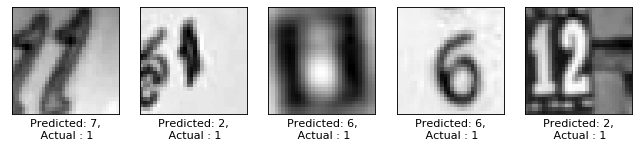

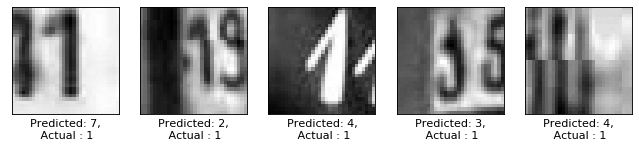

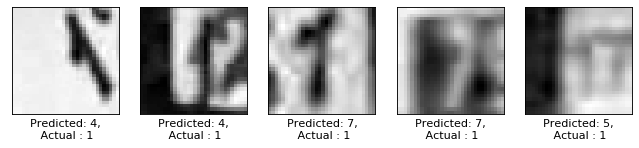

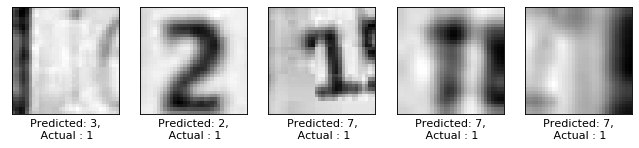

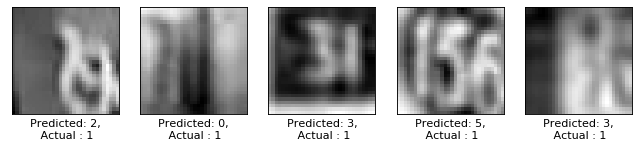

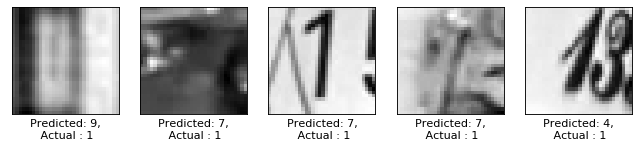

In [566]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

test_accuracy_3_1 = 0.9367005740759392
#misclassified_samples = np.nonzero(np.argmax(preprocessed_split[3], axis=1) != np.argmax(y_pred, axis=1))[0]
def plot_confusion_matrix():
    # Extract the model from the question 2.2
    model_2_2 = load_model_from_file(base_dir, "model_2_2")
    # Store the predictions
    y_pred = model_2_2.predict(rgb2gray(X_test))
    print("Accuracy: ", accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
    # List of values
    values = list(range(1, 10))
    values.append(0)
    # Build the confusion matrix 
    cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
    fig, ax = plt.subplots()
    im = ax.imshow(cm)
    ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
    ax.set_xticklabels(values, rotation=45, ha="right")
    ax.set_yticklabels(values)
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    for i in range(100):
        ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")
        
def plot_misclassifications():
    # Extract the model from the question 2.2
    model_2_2 = load_model_from_file(base_dir, "model_2_2")
    # Store the predictions
    y_pred = model_2_2.predict(rgb2gray(X_test))
    # List of values
    values = list(range(1, 10))
    values.append(0)
    # Number of test samples
    nr_samples = np.size(y_test,0)
    # Extract the missclassified samples
    target_class = np.full((nr_samples), 0)
    misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]
    target_samples = np.nonzero(np.argmax(y_test, axis=1) == target_class)[0]
    misclassified_samples = list(set(misclassified_samples).intersection(set(target_samples)))
    # Visualize the (first 20) misclassifications, together with the predicted and actual class
    fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
    for nr, k in enumerate(misclassified_samples[:5]):
        axes[nr].imshow(rgb2gray(X_test)[k][:,:,0], cmap="gray")
        axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (values[np.argmax(y_pred[k])],values[np.argmax(y_test[k])]))
        axes[nr].set_xticks(()), axes[nr].set_yticks(())
    fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
    for nr, k in enumerate(misclassified_samples[5:10]):
        axes[nr-5].imshow(rgb2gray(X_test)[k][:,:,0], cmap="gray")
        axes[nr-5].set_xlabel("Predicted: %s,\n Actual : %s" % (values[np.argmax(y_pred[k])],values[np.argmax(y_test[k])]))
        axes[nr-5].set_xticks(()), axes[nr-5].set_yticks(())
    fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
    for nr, k in enumerate(misclassified_samples[10:15]):
        axes[nr].imshow(rgb2gray(X_test)[k][:,:,0], cmap="gray")
        axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (values[np.argmax(y_pred[k])],values[np.argmax(y_test[k])]))
        axes[nr].set_xticks(()), axes[nr].set_yticks(())
    fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
    for nr, k in enumerate(misclassified_samples[15:20]):
        axes[nr-5].imshow(rgb2gray(X_test)[k][:,:,0], cmap="gray")
        axes[nr-5].set_xlabel("Predicted: %s,\n Actual : %s" % (values[np.argmax(y_pred[k])],values[np.argmax(y_test[k])]))
        axes[nr-5].set_xticks(()), axes[nr-5].set_yticks(())
    fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
    for nr, k in enumerate(misclassified_samples[20:25]):
        axes[nr].imshow(rgb2gray(X_test)[k][:,:,0], cmap="gray")
        axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (values[np.argmax(y_pred[k])],values[np.argmax(y_test[k])]))
        axes[nr].set_xticks(()), axes[nr].set_yticks(())
    fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
    for nr, k in enumerate(misclassified_samples[25:30]):
        axes[nr-5].imshow(rgb2gray(X_test)[k][:,:,0], cmap="gray")
        axes[nr-5].set_xlabel("Predicted: %s,\n Actual : %s" % (values[np.argmax(y_pred[k])],values[np.argmax(y_test[k])]))
        axes[nr-5].set_xticks(()), axes[nr-5].set_yticks(())   
    
plot_confusion_matrix()
plot_misclassifications()
answer_q_3_1 = """In general, the model gets confused over two groups of digits 1,2,4,7 and 5,3,6,8,9. However, it can
be explained since digits within the groups are very similar: first group - diagonal with a cap on top, second group -
circular shapes. It seems that the model labels the digit with "1" when it is unsure about its decision. Next, consider
the mistakes for the class of digit "1". Model thinks its a 7 when 1 has somewhat perpendicular cap. It thinks its a
4, when cap has very little angle from 1's body. So some errors are introduced due to difference in fonts. Sometimes,
pictures are too noisy and even unreadable for human eye. Sometimes, the pictures are mislabeled from the start and
model actually gives a correct answer. Sometimes, digit color is barely distinguishable from the background."""
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

/Users/andreiagaronian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


Answer is 497 characters long


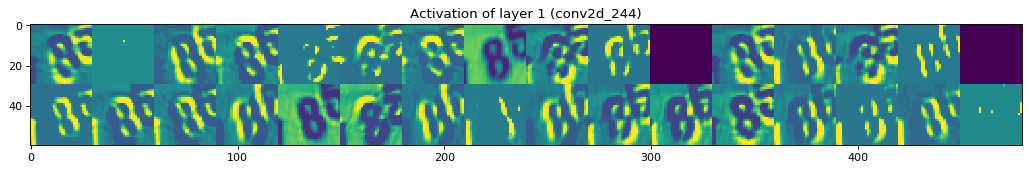

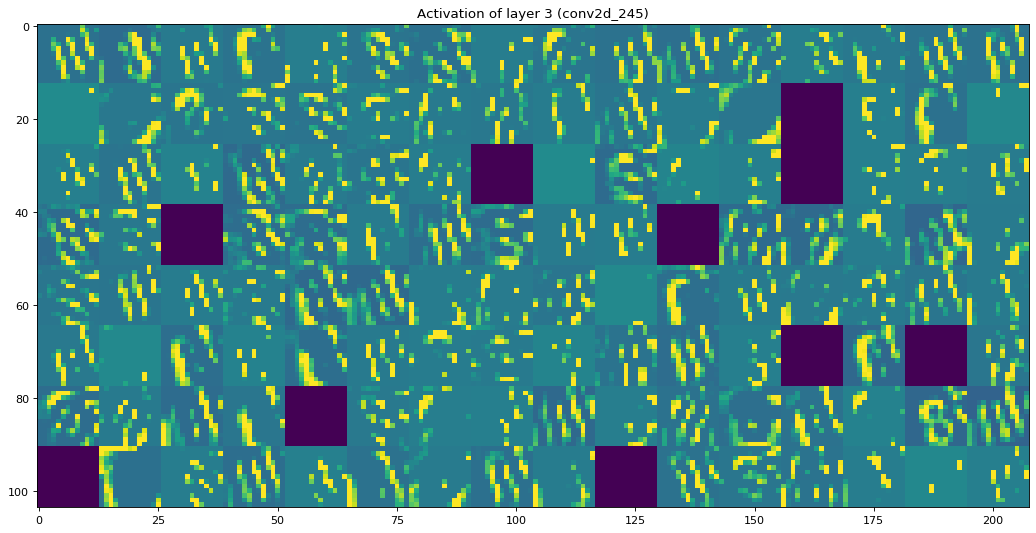

In [565]:
def plot_activations():
    images_per_row = 16
    img_tensor = rgb2gray(X_test)[0]
    img_tensor = np.expand_dims(img_tensor, axis=0)
    # Extract the model from the question 2.2
    model_2_2 = load_model_from_file(base_dir, "model_2_2")
    # Extract the outputs of the top 5 layers:
    layer_outputs = [layer.output for layer in model_2_2.layers[:5]]
    # Extract the layer names:
    layer_names = []
    for layer in model_2_2.layers[:5]:
        layer_names.append(layer.name)
    # Creates a model that will return these outputs, given the model input:
    activation_model = models.Model(inputs=model_2_2.input, outputs=layer_outputs)
    # This will return a list of 5 Numpy arrays:
    # one array per layer activation
    activations = activation_model.predict(img_tensor)
    layer_indexes = [0,2]
    for l_i in layer_indexes:
        layer_index = l_i
        start = layer_index
        end = layer_index+1
        for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
            # This is the number of features in the feature map
            n_features = layer_activation.shape[-1]

            # The feature map has shape (1, size, size, n_features)
            size = layer_activation.shape[1]

            # We will tile the activation channels in this matrix
            n_cols = n_features // images_per_row
            display_grid = np.zeros((size * n_cols, images_per_row * size))

            # We'll tile each filter into this big horizontal grid
            for col in range(n_cols):
                for row in range(images_per_row):
                    channel_image = layer_activation[0,
                                                     :, :,
                                                     col * images_per_row + row]
                    # Post-process the feature to make it visually palatable
                    channel_image -= channel_image.mean()
                    channel_image /= channel_image.std()
                    channel_image *= 64
                    channel_image += 128
                    channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                    display_grid[col * size : (col + 1) * size,
                                 row * size : (row + 1) * size] = channel_image

            # Display the grid
            scale = 1. / size
            plt.figure(figsize=(scale * display_grid.shape[1],
                                scale * display_grid.shape[0]))
            plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')
        
plot_activations()

answer_q_3_2 = """I only display activations for the first 2 convolutional layers; after the last maxpooling the images
are very low resolution and impossible to be intepreted. The model indeed learning something useful. Activations of 
layer 1: [0,7] - background recogniser; [0,2],[0,3],[1,2] - recognise different edges; Activations of 
layer 2: [7,14] - recognises the empty circles inside the 8. Nevertheless, some filters are repetetive and 
some simply don't trigger any patters after being applied to input."""
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

Sanity Check
Actual:  8
Predicted: 8
Class activation map


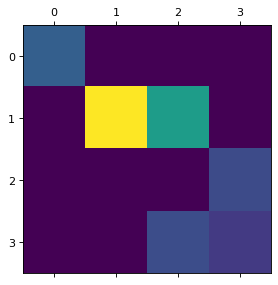

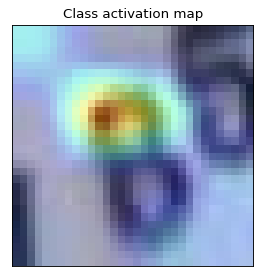

In [564]:
from tensorflow.keras import backend as K
import matplotlib.image as plt2
import cv2

def plot_3_3():
    tf.compat.v1.disable_eager_execution()
    K.clear_session()
    
    x = rgb2gray(X_test)[0]
    x = np.expand_dims(x, axis=0)
    
    # Extract the model from the question 2.2
    model_2_2 = load_model_from_file(base_dir, "model_2_2")
    
    # Sanity check
    preds = model_2_2.predict(x)
    print('Sanity Check')
    print('Actual: ', (np.argmax(y_test[0])+1) % 10)
    print('Predicted:', (np.argmax(preds[0])+1) % 10)
    
    # This is the "8" entry in the prediction vector
    number_output = model_2_2.output[:, 7]
    
    # The is the output feature map of the `conv2d_246` layer,
    # the last convolutional layer in model_2_2
    last_conv_layer = model_2_2.get_layer('conv2d_246')
    
    # This is the gradient of the "9" class with regard to
    # the output feature map of `conv2d_246`
    grads = K.gradients(number_output, last_conv_layer.output)[0]
    
    # This is a vector of shape (512,), where each entry
    # is the mean intensity of the gradient over a specific feature map channel
    pooled_grads = K.mean(grads, axis=(0,1,2))
    
    # This function allows us to access the values of the quantities we just defined:
    # `pooled_grads` and the output feature map of `conv2d_246`,
    # given a sample image
    iterate = K.function([model_2_2.input], [pooled_grads, last_conv_layer.output[0]])
    
    # These are the values of these two quantities, as Numpy arrays,
    # given our sample image of 9
    pooled_grads_value, conv_layer_output_value = iterate([x])
    
    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the class 9
    for i in range(512):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation

    print('Class activation map')
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    plt.matshow(heatmap)
    plt.show()
    
    plt2.imsave(base_dir + 'class8.jpg', X_test[0])
    
    # We use cv2 to load the original image
    img = cv2.imread(base_dir + 'class8.jpg')

    # We resize the heatmap to have the same size as the original image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # We convert the heatmap to RGB
    heatmap = np.uint8(255 * heatmap)

    # We apply the heatmap to the original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # 0.4 here is a heatmap intensity factor
    superimposed_img = heatmap * 0.4 + img

    # Save the image to disk
    cv2.imwrite(base_dir + 'class8_super.jpg', superimposed_img)
    img = cv2.imread(base_dir + 'class8_super.jpg')
    RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(RGB_im)
    plt.title('Class activation map')
    plt.xticks([])
    plt.yticks([])
    plt.show()

plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Loading model from file
Success!
Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_27 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_185 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_186 (Dense)            (None, 10)                1290      
Total params: 14,781,642
Trainable params: 7,146,378
Non-trainable params: 7,635,264
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.406316  0.679686  0.588214      0.760433
max  1.041655  0.890706  0.790984      0.829609
Answer is 498 characters long


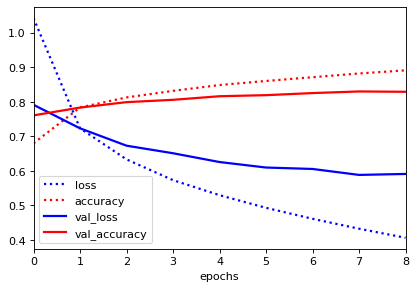

In [559]:
from tensorflow.keras.applications.vgg16 import VGG16

def build_model_4_1():
    conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(32, 32, 3))
    model = models.Sequential()
    model.add(conv_base)
    for layer in conv_base.layers:
        if layer.name == 'block5_conv1':
            layer.trainable = True
        elif layer.name == 'block5_conv2':
            layer.trainable = True
        elif layer.name == 'block5_conv3':
            layer.trainable = True
        else:
            layer.trainable = False
    model.add(layers.Flatten())
    model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adagrad',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=9, batch_size=32)
answer_q_4_1 = """ImageNet is a dataset of images wihh +- 22,000 categories. Since VGG16 was trained on
different domain, the convolution layers may be knowing patterns that are completely irrelevant to our problem.
Thus, when we dont unfreeze any layer of 5th block, the model gives poor perfromance. The best choice observed
is to unfreeze 5th block entirely. Then, we can observe that model starts to overfit after 2 epochs. So we apply the
L2 regurlarization, such that overfit is expected only after 8/9 epochs."""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [563]:
import pickle
import gzip
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline, FeatureUnion, Pipeline

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
    """ Stores all necessary embeddings to file
    """
    # Extract the model from the question 2.2
    model_4_1 = load_model_from_file(base_dir, "model_4_1")
    # Extract the outputs of the top 5 layers:
    base = model_4_1.layers[0]
    X_train_emb = base.predict(X_train)
    X_test_emb = base.predict(X_test)
    # Store the embeddings
    store_embedding(X_train_emb, "X_train_emb")
    store_embedding(X_test_emb, "X_test_emb")

def generate_pipeline():
    """ Returns an sklearn pipeline."""
    pipe = Pipeline(
        steps=[
                ('classifier', SVC(kernel='rbf', random_state=1))
        ]
    );
    return pipe

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
    """ Evaluates the given pipeline, trained on the given embedded training set and 
    evaluated on the supplied embedded test set. Returns the accuracy score.
    """
    # reshape the data such that it can be fed to machine learning model
    X_train = np.reshape(X_train, (np.size(y_train,0), 512))
    X_test = np.reshape(X_test, (np.size(y_test,0), 512))
    y_train = np.argmax(y_train, axis=1)
    y_test = np.argmax(y_test, axis=1)
    # train the pipeline
    pipeline.fit(X_train,y_train)
    # feed the test data to the trained pipeline
    y_pred = pipeline.predict(X_test)
    # check the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # return it
    return accuracy

def evaluation_4_2(X_train, y_train, X_test, y_test):
    """ Runs 'evaluate_pipeline' with embedded versions of the input data 
    and returns the accuracy.
    """
    accuracy = evaluate_pipeline(generate_pipeline(), load_embedding("X_train_emb"), y_train, load_embedding("X_test_emb"), y_test)
    return accuracy

#store_embeddings()
accuracy = evaluation_4_2(load_embedding("X_train_emb"), y_train, load_embedding("X_test_emb"), y_test)
print("Accuracy: ", accuracy)
answer_q_4_2 = """The obtained accuracy is 0.832 which is close to perfromance of model 4.1. I evaluated logistic
regression, random forest, etc. The best match was rbf kernel. Applying scaling does not provide any imporvement.
I think we could get a better result, with better embeddings. That is if the convolutional layers would hold only
information relevant to the problem domain, while first 4 blocks of VGG16 were trained on completeley different
images with much greater resolution."""
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Pipeline: Pipeline(memory=None,
         steps=[('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Answer is 472 characters long
